In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
xi = np.linspace(-10,10,100);
t = np.linspace(0,4*np.pi,80);
dt = t[1] - t[0];

xx,tt = np.meshgrid(xi,t)

f1 = 1/np.cosh(xx+3)*(1*np.exp(2.3j*tt))
f2 = (1/np.cosh(xx)*np.tanh(xx))*(2*np.exp(2.8j*tt))
f = f1+f2

In [29]:
X = f.T

X1 = X[:,:-1]
X2 = X[:,1:]

u,s,vt = np.linalg.svd(X1,full_matrices=False)

In [41]:
r = 2;
u_hat = u[:,:r]
s_hat = s[:r]
v_hat = vt[:r].conjugate().T

S = u_hat.conjugate().T@X2@v_hat@np.diag(1/s_hat)

In [42]:
Lambda,W = np.linalg.eig(S)

In [43]:
#Phi = U_hat@W
Phi = X2@v_hat@np.diag(1/s_hat)@W#@np.diag(Lambda)

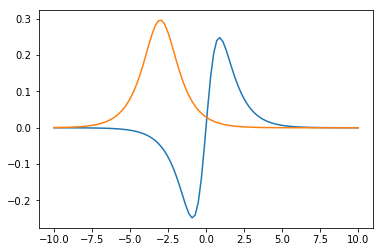

In [44]:
plt.figure()
plt.plot(xi,np.real(Phi[:,0]))
plt.plot(xi,np.real(Phi[:,1]))
plt.show()

In [45]:
omega = np.log(Lambda)/dt

b = np.linalg.lstsq(Phi,X[:,0])[0]

u_modes = np.zeros((r,len(t)))
for j,tt in enumerate(t):
    u_modes[:,j] = np.exp(omega*tt)*b

/home/tyler/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: ComplexWarning: Casting complex values to real discards the imaginary part


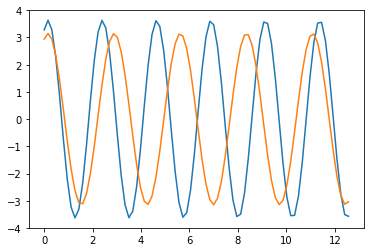

In [46]:
plt.figure()
plt.plot(t,np.real(u_modes[0]))
plt.plot(t,np.real(u_modes[1]))
plt.show()

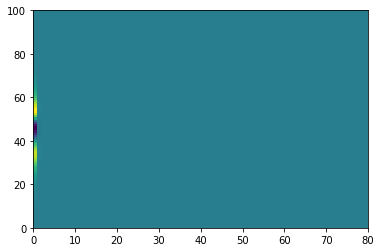

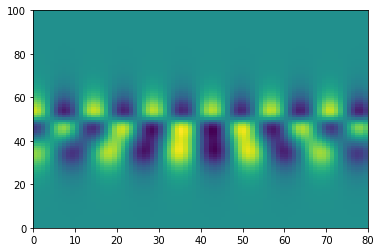

In [40]:
X_dmd = Phi@u_modes
plt.figure()
plt.pcolor(np.real(X_dmd))
plt.show()

plt.figure()
plt.pcolor(np.real(f.T))
plt.show()